# Unsupervised Learning: More Centroid Clustering

In [104]:
!pip install seaborn

In [105]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns

For today's small group we'll be diving into centroid clustering algorithms in more depth!

First, we need to generate some data to play with:

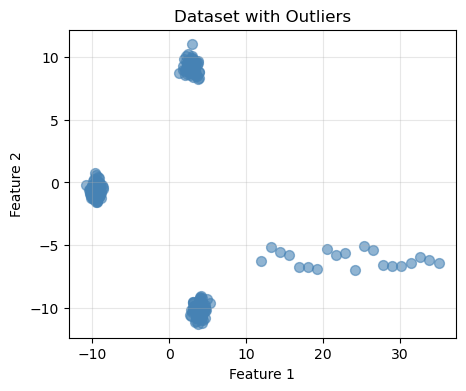

In [106]:
X_base, y_true = make_blobs(n_samples=300, centers=3, n_features=2, 
                            cluster_std=0.8, random_state=42)

X_base[y_true == 0] = X_base[y_true == 0] * 0.6 + [-8, -6] 
X_base[y_true == 1] = X_base[y_true == 1] * 0.6 + [0, 8]    
X_base[y_true == 2] = X_base[y_true == 2] * 0.6 + [8, -6]   

np.random.seed(42)
outlier_x = np.linspace(12, 35, 20)  # Long horizontal spread
outlier_y = np.random.uniform(-7, -5, 20)  # Some vertical spread
outliers = np.column_stack([outlier_x, outlier_y])

X = np.vstack([X_base, outliers])

plt.figure(figsize=(5, 4))
# Plot all data in one color to simulate unsupervised learning
plt.scatter(X[:, 0], X[:, 1], c='steelblue', alpha=0.6, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Outliers')

plt.grid(True, alpha=0.3)
plt.show()

Notice the outliers? Let's see how these affect our centroid clustering algorithms!

----

## Part 1: Implementing K-Means Clustering

### Q: Use sklearn's `KMeans` to cluster the data

In [71]:
# Important: Set random_state = 42 so we all get the same results
# Create a KMeans object 
initial_centroids = X[np.random.choice(len(X), 3, replace=False)]
kmeans = KMeans (n_clusters=3, random_state=42)

# Fit the model to the data (delete line below for student version)
fitted = kmeans.fit_predict(X)

# Get the cluster labels
kmeans_labels = kmeans.labels_

# Get the cluster centers
kmeans_centers = kmeans.cluster_centers_

print("K-Means Clustering Complete!")
print(f"Cluster centers shape: {kmeans_centers.shape}")
print(f"Unique labels: {np.unique(kmeans_labels)}")
print(f"\nCluster Centers:\n{kmeans_centers}")







K-Means Clustering Complete!
Cluster centers shape: (3, 2)
Unique labels: [0 1 2]

Cluster Centers:
[[ 2.83539508  9.20186561]
 [-9.5650554  -0.57737217]
 [ 7.1418219  -9.49570386]]


### Visualize K-Means Results

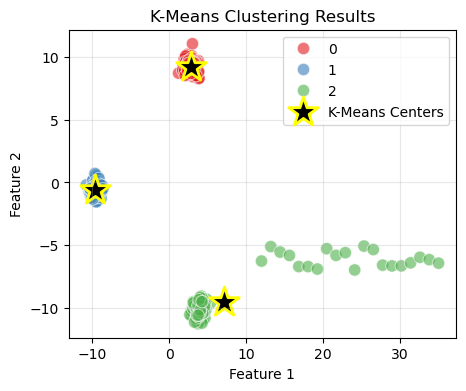

In [72]:
plt.figure(figsize=(5, 4))
# Scatter plot colored by cluster labels
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, 
               palette='Set1', s=80, alpha=0.6)
# Plot cluster centers
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], 
           c='black', marker='*', s=500, edgecolors='yellow', 
           linewidths=2, label='K-Means Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Q: How did K-Means perform? Did the outliers affect the cluster centers?


### A: 
K-Means center on the green cluster is skewed toward te outliers. 

### Q: How could we evaluate the performance quantitatively?

In [81]:

from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans_labels)


0.8471589826424626

----

## Part 2: Implementing K-Medians Clustering

The median of a cluster is calculated by collecting all points assigned to a cluster and then for each dimension separately sorting all values in that dimension and picking the middle value (median). The point with median value for each dimension is then used as the centeroid.

**The goal is to minimize the sum of absolute differences between data points and their assigned centeroid.**

### Q: Fill in the missing code from the K-Medians function

In [97]:
def KMedians(X, n_clusters=3, max_iters=100, random_state=None):
    """
    Implement K-Medians clustering algorithm.
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples, n_features = X.shape
    
    # Initialize centers randomly by selecting n_clusters random points from X
    random_indices = np.random.choice(n_samples, n_clusters, replace=False)
    centers = X[random_indices].copy()
    
    for iteration in range(max_iters):
        # Assign each point to the nearest center
        labels = np.zeros(n_samples, dtype=int)
        
        for i in range(n_samples):
            # Calculate distance from point i to each center
            distances = np.array([np.sum(np.abs(X[i] - center)) for center in centers])
            # Assign label as the index of the closest center
            labels[i] = np.argmin(distances)
        
        # Store old centers to check for convergence
        old_centers = centers.copy()
        
        # Update centers to be the median of points in each cluster
        for k in range(n_clusters):
            # Get all points assigned to cluster k
            cluster_points = X[labels==k]
            
            if len(cluster_points) > 0:
                # Calculate median for each dimension
                centers[k] = np.median(cluster_points, axis=0)
        
        # Check for convergence
        if np.allclose(old_centers, centers):
            print(f"Converged after {iteration + 1} iterations")
            break
    
    return labels, centers

### Apply K-Medians to the Dataset

In [98]:
# Important: Set random_state = 57 so we all get the same results
# Apply K-Medians function
kmedians_labels, kmedians_centers = KMedians(X, n_clusters=3, max_iters=100, random_state=57 )

print("K-Medians Clustering Complete!")
print(f"Cluster centers shape: {kmedians_centers.shape}")
print(f"Unique labels: {np.unique(kmedians_labels)}")
print(f"\nCluster Centers:\n{kmedians_centers}")

Converged after 2 iterations
K-Medians Clustering Complete!
Cluster centers shape: (3, 2)
Unique labels: [0 1 2]

Cluster Centers:
[[  4.03044162 -10.10032093]
 [ -9.52244765  -0.51340591]
 [  2.82539943   9.18937992]]


### Visualize K-Medians Results

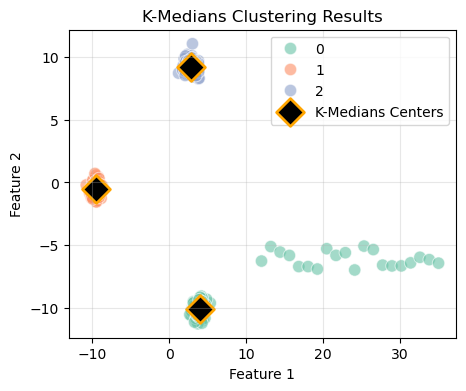

In [99]:
plt.figure(figsize=(5,4))
# Scatter plot colored by cluster labels
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmedians_labels, 
               palette='Set2', s=80, alpha=0.6)
# Plot cluster centers
plt.scatter(kmedians_centers[:, 0], kmedians_centers[:, 1], 
           c='black', marker='D', s=200, edgecolors='orange', 
           linewidths=2, label='K-Medians Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Medians Clustering Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Comparing K-Means vs K-Medians


### Side-by-Side Comparison

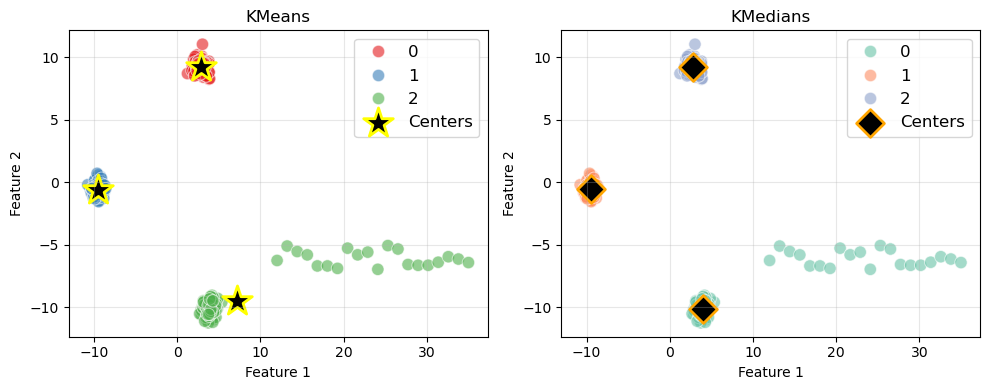

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# K-Means plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, 
               palette='Set1', s=80, alpha=0.6, ax=axes[0])
axes[0].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], 
               c='black', marker='*', s=500, edgecolors='yellow', 
               linewidths=2, label='Centers')
axes[0].set_title('KMeans')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=12)

# K-Medians plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmedians_labels, 
               palette='Set2', s=80, alpha=0.6, ax=axes[1])
axes[1].scatter(kmedians_centers[:, 0], kmedians_centers[:, 1], 
               c='black', marker='D', s=200, edgecolors='orange', 
               linewidths=2, label='Centers')
axes[1].set_title('KMedians')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

### Q: Which algorithm performed better on the dataset with outliers? 

Please explain your reasoning!


### A:
KMedian works better. Since there are more data points existing in a cluster than the outliers that affect the centers, choosing by median eliminates the outliers. Therefore it works better with data set involving outliers. 

Imagine we used this process for customer segmentation:

- **K-Means**: Might create a "customer profile" that doesn't represent any real customer (pulled by outliers)
 - **K-Medians**: Creates a profile that represents typical customers in the cluster

### Key Idea 💡
The outliers were assigned to clusters in both cases, but:

- K-Means let them distort the cluster centers
- K-Medians kept the centers true to the main group

### Testing on Normally Distributed Data

Normally distributed data has the same mean, median, and mode

<p align="left">
    <img src = "https://ift.world/wp-content/uploads/2018/06/L1-V1-25_2.jpg" width = "400">
</p>

Let's create some normally distributed clusters to experiment with:

Normal dataset shape: (300, 2)


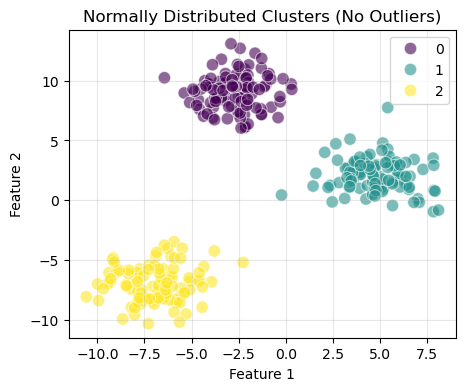

In [101]:
# Create a clean dataset with normally distributed clusters
X_normal, y_normal_true = make_blobs(n_samples=300, centers=3, n_features=2, 
                                     cluster_std=1.5, random_state=42)

print(f"Normal dataset shape: {X_normal.shape}")

# Visualize the dataset
plt.figure(figsize=(5,4))
sns.scatterplot(x=X_normal[:, 0], y=X_normal[:, 1], 
               hue=y_normal_true, palette='viridis', s=80, alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Normally Distributed Clusters (No Outliers)')
plt.grid(True, alpha=0.3)
plt.show()

### Q: Apply both algorithms to the normally distributed clusters

In [102]:
# Important: Set random_state = 42 for both algorithms
# Apply K-Means
kmeans_normal = KMeans(n_clusters=3, random_state=42)
kmeans_normal.fit(X_normal)
kmeans_normal_labels = kmeans_normal.labels_
kmeans_normal_centers = kmeans_normal.cluster_centers_

# Apply K-Medians
kmedians_normal_labels, kmedians_normal_centers = KMedians(X_normal, n_clusters=3, max_iters=100, random_state=42)

print("Clustering on normal data complete!")

Converged after 3 iterations
Clustering on normal data complete!


### Visualize Both Results on Normal Data

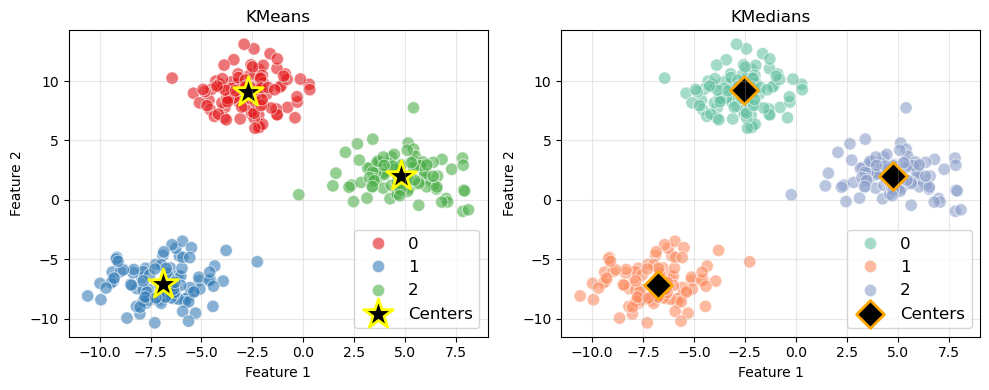

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# K-Means plot
sns.scatterplot(x=X_normal[:, 0], y=X_normal[:, 1], hue=kmeans_normal_labels, 
               palette='Set1', s=80, alpha=0.6, ax=axes[0])
axes[0].scatter(kmeans_normal_centers[:, 0], kmeans_normal_centers[:, 1], 
               c='black', marker='*', s=500, edgecolors='yellow', 
               linewidths=2, label='Centers')
axes[0].set_title('KMeans')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=12)

# K-Medians plot
sns.scatterplot(x=X_normal[:, 0], y=X_normal[:, 1], hue=kmedians_normal_labels, 
               palette='Set2', s=80, alpha=0.6, ax=axes[1])
axes[1].scatter(kmedians_normal_centers[:, 0], kmedians_normal_centers[:, 1], 
               c='black', marker='D', s=200, edgecolors='orange', 
               linewidths=2, label='Centers')
axes[1].set_title('KMedians')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

### Q: How do the performances compare on normally distributed data? Are they similar or different?

### A:
Mean is shifted but medians are right in the center. 

----
## Closing Questions 🧐

### 1. When would you choose K-Means over K-Medians? 

When there are no outliers. bc mean finds the accurate center of the cluster.

### 2. When would you choose K-Medians over K-Means?

In a situation where there exists a outliers that interferes with the cluster.

### 3. What are the main limitations of both algorithms?
Since they both seperate the data based on the center point, it can miss identify the data points when the custer has shape else then spherical shape. It fails to account for the density trend of the data points.

### 4. Can you think of a real-world scenario where outliers might significantly impact clustering?
customer spend based on income. Few rich individuals can significantly change the cluster from the true cluster.


